In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder \
   .appName("Neural Network Model") \
   .config("spark.executor.memory", "3gb") \
   .getOrCreate()
   
sc = spark.sparkContext

In [3]:
sc

<SparkContext master=spark://aekanun-spark-deeplearn:7077 appName=PySparkShell>

### DataFrame - Generating a dataset

In [4]:
raw_df = spark.createDataFrame([('Male', 67, 150), # insert column values
                            ('Female', 65, 135),
                            ('Female', 68, 130),
                            ('Male', 70, 160),
                            ('Female', 70, 130),
                            ('Male', 69, 174),
                            ('Female', 65, 126),
                            ('Male', 74, 188),
                            ('Female', 60, 110),
                            ('Female', 63, 125),
                            ('Male', 70, 173),
                            ('Male', 70, 145),
                            ('Male', 68, 175),
                            ('Female', 65, 123),
                            ('Male', 71, 145),
                            ('Male', 74, 160),
                            ('Female', 64, 135),
                            ('Male', 71, 175),
                            ('Male', 67, 145),
                            ('Female', 67, 130),
                            ('Male', 70, 162),
                            ('Female', 64, 107),
                            ('Male', 70, 175),
                            ('Female', 64, 130),
                            ('Male', 66, 163),
                            ('Female', 63, 137),
                            ('Male', 65, 165),
                            ('Female', 65, 130),
                            ('Female', 64, 109)], 
                           ['gender', 'height','weight']) # insert header values

In [5]:
raw_df.show(5)

+------+------+------+
|gender|height|weight|
+------+------+------+
|  Male|    67|   150|
|Female|    65|   135|
|Female|    68|   130|
|  Male|    70|   160|
|Female|    70|   130|
+------+------+------+
only showing top 5 rows



### DataFrame - Converting categorical values to numerical ones

In [6]:
from pyspark.sql import functions

In [7]:
numerical_df = raw_df.withColumn('gender',\
                                 functions.when(raw_df['gender']=='Female',0).\
                                 otherwise(1))

### DataFrame -  Sorting columns

In [8]:
orderedcolumns_df = numerical_df.select('height', 'weight', 'gender')

In [9]:
orderedcolumns_df.show(5)

+------+------+------+
|height|weight|gender|
+------+------+------+
|    67|   150|     1|
|    65|   135|     0|
|    68|   130|     0|
|    70|   160|     1|
|    70|   130|     0|
+------+------+------+
only showing top 5 rows



In [10]:
import numpy as np

In [11]:
orderedcolumns_df.collect()

[Row(height=67, weight=150, gender=1),
 Row(height=65, weight=135, gender=0),
 Row(height=68, weight=130, gender=0),
 Row(height=70, weight=160, gender=1),
 Row(height=70, weight=130, gender=0),
 Row(height=69, weight=174, gender=1),
 Row(height=65, weight=126, gender=0),
 Row(height=74, weight=188, gender=1),
 Row(height=60, weight=110, gender=0),
 Row(height=63, weight=125, gender=0),
 Row(height=70, weight=173, gender=1),
 Row(height=70, weight=145, gender=1),
 Row(height=68, weight=175, gender=1),
 Row(height=65, weight=123, gender=0),
 Row(height=71, weight=145, gender=1),
 Row(height=74, weight=160, gender=1),
 Row(height=64, weight=135, gender=0),
 Row(height=71, weight=175, gender=1),
 Row(height=67, weight=145, gender=1),
 Row(height=67, weight=130, gender=0),
 Row(height=70, weight=162, gender=1),
 Row(height=64, weight=107, gender=0),
 Row(height=70, weight=175, gender=1),
 Row(height=64, weight=130, gender=0),
 Row(height=66, weight=163, gender=1),
 Row(height=63, weight=13

## 1. Transform Spark’s DataFrame to Numpy’s Array.

In [12]:
data_array = np.array(orderedcolumns_df.collect())

In [13]:
data_array

array([[ 67, 150,   1],
       [ 65, 135,   0],
       [ 68, 130,   0],
       [ 70, 160,   1],
       [ 70, 130,   0],
       [ 69, 174,   1],
       [ 65, 126,   0],
       [ 74, 188,   1],
       [ 60, 110,   0],
       [ 63, 125,   0],
       [ 70, 173,   1],
       [ 70, 145,   1],
       [ 68, 175,   1],
       [ 65, 123,   0],
       [ 71, 145,   1],
       [ 74, 160,   1],
       [ 64, 135,   0],
       [ 71, 175,   1],
       [ 67, 145,   1],
       [ 67, 130,   0],
       [ 70, 162,   1],
       [ 64, 107,   0],
       [ 70, 175,   1],
       [ 64, 130,   0],
       [ 66, 163,   1],
       [ 63, 137,   0],
       [ 65, 165,   1],
       [ 65, 130,   0],
       [ 64, 109,   0]])

In [14]:
data_array.shape

(29, 3)

In [15]:
data_array[0]

array([ 67, 150,   1])

In [16]:
data_array[28]

array([ 64, 109,   0])

##### Visualizing the data using Numpy and Matplotlib

In [17]:
data_array.max(axis=0)

array([ 74, 188,   1])

In [18]:
data_array.min(axis=0)

array([ 60, 107,   0])

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

##### Define range of x and range of y.

In [20]:
min_x = data_array.min(axis=0)[0]-10
max_x = data_array.max(axis=0)[0]+10
min_y = data_array.min(axis=0)[1]-10
max_y = data_array.max(axis=0)[1]+10

In [21]:
min_x, max_x, min_y, max_y

(50, 84, 97, 198)

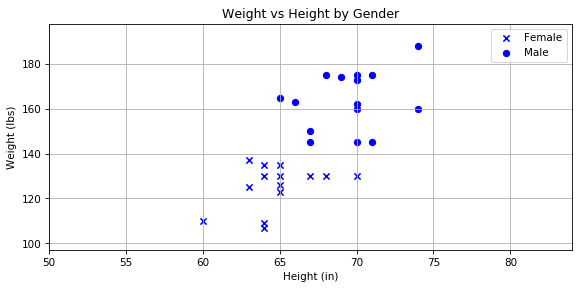

In [22]:
# formatting the plot grid, scales, and figure size
plt.figure(figsize=(9, 4), dpi= 75)
plt.axis([min_x,max_x,min_y,max_y])
plt.grid()
for i in range(len(data_array)):
    value = data_array[i]
    # assign labels values to specific matrix elements
    gender = value[2]
    height = value[0]
    weight = value[1]
    
    # filter data points by gender
    a = plt.scatter(height[gender==0],weight[gender==0], \
                    marker = 'x', c= 'b', label = 'Female')
    b = plt.scatter(height[gender==1],weight[gender==1], \
                    marker = 'o', c= 'b', label = 'Male')
    
    # plot values, title, legend, x and y axis
    plt.title('Weight vs Height by Gender')
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.legend(handles=[a,b])

### 2. Making Standardization of x

In [23]:
type(data_array)

numpy.ndarray

In [24]:
data_array

array([[ 67, 150,   1],
       [ 65, 135,   0],
       [ 68, 130,   0],
       [ 70, 160,   1],
       [ 70, 130,   0],
       [ 69, 174,   1],
       [ 65, 126,   0],
       [ 74, 188,   1],
       [ 60, 110,   0],
       [ 63, 125,   0],
       [ 70, 173,   1],
       [ 70, 145,   1],
       [ 68, 175,   1],
       [ 65, 123,   0],
       [ 71, 145,   1],
       [ 74, 160,   1],
       [ 64, 135,   0],
       [ 71, 175,   1],
       [ 67, 145,   1],
       [ 67, 130,   0],
       [ 70, 162,   1],
       [ 64, 107,   0],
       [ 70, 175,   1],
       [ 64, 130,   0],
       [ 66, 163,   1],
       [ 63, 137,   0],
       [ 65, 165,   1],
       [ 65, 130,   0],
       [ 64, 109,   0]])

##### x only contains both of height and weight

In [25]:
x = data_array[:,:2]

In [26]:
x

array([[ 67, 150],
       [ 65, 135],
       [ 68, 130],
       [ 70, 160],
       [ 70, 130],
       [ 69, 174],
       [ 65, 126],
       [ 74, 188],
       [ 60, 110],
       [ 63, 125],
       [ 70, 173],
       [ 70, 145],
       [ 68, 175],
       [ 65, 123],
       [ 71, 145],
       [ 74, 160],
       [ 64, 135],
       [ 71, 175],
       [ 67, 145],
       [ 67, 130],
       [ 70, 162],
       [ 64, 107],
       [ 70, 175],
       [ 64, 130],
       [ 66, 163],
       [ 63, 137],
       [ 65, 165],
       [ 65, 130],
       [ 64, 109]])

##### Calculate Mean and Std. of x

In [27]:
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)

In [28]:
def normalize(origi):
    origi_mean = origi.mean(axis=0)
    origi_std = origi.std(axis=0)
    new = (origi - origi_mean)/origi_std
    return new

In [29]:
x_normalized = normalize(x)

In [30]:
x_normalized

array([[-0.06163661,  0.21460055],
       [-0.65745714, -0.4618577 ],
       [ 0.23627366, -0.68734378],
       [ 0.8320942 ,  0.66557271],
       [ 0.8320942 , -0.68734378],
       [ 0.53418393,  1.29693375],
       [-0.65745714, -0.86773265],
       [ 2.02373527,  1.92829478],
       [-2.14700848, -1.58928812],
       [-1.25327768, -0.91282987],
       [ 0.8320942 ,  1.25183653],
       [ 0.8320942 , -0.01088554],
       [ 0.23627366,  1.34203096],
       [-0.65745714, -1.0030243 ],
       [ 1.13000446, -0.01088554],
       [ 2.02373527,  0.66557271],
       [-0.95536741, -0.4618577 ],
       [ 1.13000446,  1.34203096],
       [-0.06163661, -0.01088554],
       [-0.06163661, -0.68734378],
       [ 0.8320942 ,  0.75576715],
       [-0.95536741, -1.72457977],
       [ 0.8320942 ,  1.34203096],
       [-0.95536741, -0.68734378],
       [-0.35954687,  0.80086436],
       [-1.25327768, -0.37166327],
       [-0.65745714,  0.8910588 ],
       [-0.65745714, -0.68734378],
       [-0.95536741,

##### y only contains sex

In [31]:
y = data_array[:,2]

In [32]:
y

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0])

##### Merge x with y.

In [33]:
normalized_data_array = np.column_stack((x_normalized[:,0], \
                                         x_normalized[:,1],y))

In [34]:
normalized_data_array

array([[-0.06163661,  0.21460055,  1.        ],
       [-0.65745714, -0.4618577 ,  0.        ],
       [ 0.23627366, -0.68734378,  0.        ],
       [ 0.8320942 ,  0.66557271,  1.        ],
       [ 0.8320942 , -0.68734378,  0.        ],
       [ 0.53418393,  1.29693375,  1.        ],
       [-0.65745714, -0.86773265,  0.        ],
       [ 2.02373527,  1.92829478,  1.        ],
       [-2.14700848, -1.58928812,  0.        ],
       [-1.25327768, -0.91282987,  0.        ],
       [ 0.8320942 ,  1.25183653,  1.        ],
       [ 0.8320942 , -0.01088554,  1.        ],
       [ 0.23627366,  1.34203096,  1.        ],
       [-0.65745714, -1.0030243 ,  0.        ],
       [ 1.13000446, -0.01088554,  1.        ],
       [ 2.02373527,  0.66557271,  1.        ],
       [-0.95536741, -0.4618577 ,  0.        ],
       [ 1.13000446,  1.34203096,  1.        ],
       [-0.06163661, -0.01088554,  1.        ],
       [-0.06163661, -0.68734378,  0.        ],
       [ 0.8320942 ,  0.75576715,  1.   

## 3. Define Algorithm's Parameters for Linear Function.

##### Random generating many coefficiency

In [35]:
np.random.seed(12345)

In [36]:
w1 = np.random.randn()
w2 = np.random.randn()
b= np.random.randn()

In [37]:
print(w1, w2, b)

-0.20470765948471295 0.47894333805754824 -0.5194387150567381


## 4. Define Activate Function and its Derivation.

##### Declare Sigmoid functions and its derivation (Sigmoid derivative).

In [38]:
def sigmoid(input):
    return 1/(1+np.exp(-input))

In [39]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

##### --- test the sigmod with calculation with tiny numbers ---

In [40]:
x_test = np.arange(-10,10,1)
y_test = sigmoid(x_test)

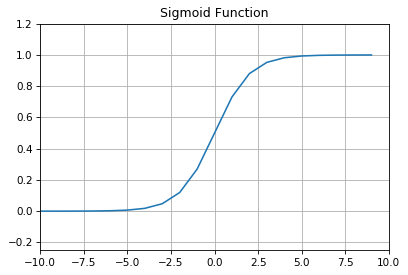

In [41]:
plt.figure(figsize=(6, 4), dpi= 75)
plt.axis([-10,10,-0.25,1.2])
plt.grid()
plt.plot(x_test,y_test)
plt.title('Sigmoid Function')
plt.show()

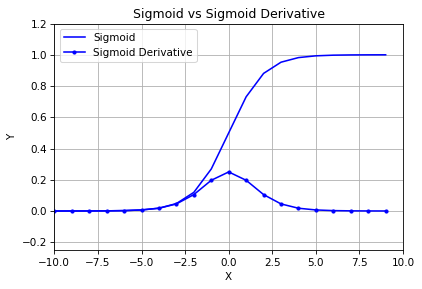

In [42]:
plt.figure(figsize=(6, 4), dpi= 75)
plt.axis([-10,10,-0.25,1.2])
plt.grid()
x_test = np.arange(-10,10,1)
y_test = sigmoid(x_test)
y_test_Prime = sigmoid_derivative(x_test)
plt.plot(x_test, y_test, label="Sigmoid",c='b')
plt.plot(x_test, y_test_Prime, marker=".", \
         label="Sigmoid Derivative", c='b')
plt.title('Sigmoid vs Sigmoid Derivative')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

##### --- Ending --- 

### 5. Launch the Deep Learning Algorithm:
Calculating of Summation, Activation Function (Sigmoid) and Backpropagation (Sigmoid Derivative)

In [43]:
normalized_data_array

array([[-0.06163661,  0.21460055,  1.        ],
       [-0.65745714, -0.4618577 ,  0.        ],
       [ 0.23627366, -0.68734378,  0.        ],
       [ 0.8320942 ,  0.66557271,  1.        ],
       [ 0.8320942 , -0.68734378,  0.        ],
       [ 0.53418393,  1.29693375,  1.        ],
       [-0.65745714, -0.86773265,  0.        ],
       [ 2.02373527,  1.92829478,  1.        ],
       [-2.14700848, -1.58928812,  0.        ],
       [-1.25327768, -0.91282987,  0.        ],
       [ 0.8320942 ,  1.25183653,  1.        ],
       [ 0.8320942 , -0.01088554,  1.        ],
       [ 0.23627366,  1.34203096,  1.        ],
       [-0.65745714, -1.0030243 ,  0.        ],
       [ 1.13000446, -0.01088554,  1.        ],
       [ 2.02373527,  0.66557271,  1.        ],
       [-0.95536741, -0.4618577 ,  0.        ],
       [ 1.13000446,  1.34203096,  1.        ],
       [-0.06163661, -0.01088554,  1.        ],
       [-0.06163661, -0.68734378,  0.        ],
       [ 0.8320942 ,  0.75576715,  1.   

In [44]:
normalized_data_array.shape

(29, 3)

In [45]:
for i in range(100):
    random_index = np.random.\
    randint(len(normalized_data_array))
    point = normalized_data_array[random_index]
    print(i, point)

0 [ 0.53418393  1.29693375  1.        ]
1 [ 0.23627366 -0.68734378  0.        ]
2 [-0.65745714 -0.4618577   0.        ]
3 [ 0.8320942   1.34203096  1.        ]
4 [ 1.13000446  1.34203096  1.        ]
5 [-0.65745714 -0.68734378  0.        ]
6 [ 1.13000446 -0.01088554  1.        ]
7 [-1.25327768 -0.91282987  0.        ]
8 [-0.65745714 -0.68734378  0.        ]
9 [-0.95536741 -0.68734378  0.        ]
10 [ 0.8320942   1.34203096  1.        ]
11 [-0.95536741 -0.4618577   0.        ]
12 [-0.06163661 -0.01088554  1.        ]
13 [-1.25327768 -0.91282987  0.        ]
14 [ 0.8320942  -0.01088554  1.        ]
15 [-0.65745714 -1.0030243   0.        ]
16 [ 0.8320942   1.25183653  1.        ]
17 [ 1.13000446  1.34203096  1.        ]
18 [-0.06163661 -0.01088554  1.        ]
19 [-0.65745714 -0.86773265  0.        ]
20 [ 2.02373527  1.92829478  1.        ]
21 [ 0.8320942  -0.01088554  1.        ]
22 [ 2.02373527  1.92829478  1.        ]
23 [-0.95536741 -0.68734378  0.        ]
24 [-0.35954687  0.8008643

##### w1, w2 and b will be adjusted using gradient descent to tweak their values and minimize the cost function.

In [46]:
learning_rate = 0.1

all_costs = []

In [47]:
for i in range(100000):
    # set the random data points that will be used to calculate the summation
    random_number = np.random.randint(len(normalized_data_array))
    random_person = normalized_data_array[random_number]
    
    # the height and weight from the random individual are selected
    height = random_person[0]
    weight = random_person[1]

    z = w1*height+w2*weight+b
    predictedGender = sigmoid(z)
    
    actualGender = random_person[2]
    
    cost = (predictedGender-actualGender)**2
    
    # the cost value is appended to the list
    all_costs.append(cost)
    
    # partial derivatives of the cost function and summation are calculated
    dcost_predictedGender = 2 * (predictedGender-actualGender)
    dpredictedGenger_dz = sigmoid_derivative(z)
    dz_dw1 = height
    dz_dw2 = weight
    dz_db = 1
    
    dcost_dw1 = dcost_predictedGender * dpredictedGenger_dz * dz_dw1
    dcost_dw2 = dcost_predictedGender * dpredictedGenger_dz * dz_dw2
    dcost_db  = dcost_predictedGender * dpredictedGenger_dz * dz_db
    
    # gradient descent calculation
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b  = b  - learning_rate * dcost_db

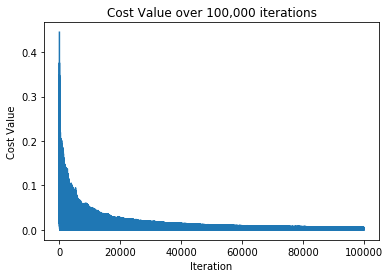

In [48]:
plt.plot(all_costs)
plt.title('Cost Value over 100,000 iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.show()

In [49]:
print('The final values of w1, w2, and b')
print('---------------------------------')
print('w1 = {}'.format(w1))
print('w2 = {}'.format(w2))
print('b  = {}'.format(b))

The final values of w1, w2, and b
---------------------------------
w1 = 1.8209212481467743
w2 = 10.501412686537124
b  = 2.6922206902934818


## 6. Make prediction

In [50]:
def input_normalize(height, weight):
    inputHeight = (height - x_mean[0])/x_std[0]
    inputWeight = (weight - x_mean[1])/x_std[1]
    return inputHeight, inputWeight

In [51]:
def predict_gender(raw_data):
    gender_summation = raw_data[0]*w1 + raw_data[1]*w2 + b
    gender_score = sigmoid(gender_summation)
    if gender_score <= 0.5:
        gender = 'Female'
    else:
        gender = 'Male'
    return gender, gender_score

##### Height = 70 inches, Weight = 180 pounds

In [52]:
new_data = input_normalize(70, 180)

In [53]:
new_data

(0.83209419621331615, 1.5675170469238868)

In [54]:
predict_gender(new_data)

('Male', 0.99999999894375113)

##### Height = 50 inches, Weight = 120 pounds

In [55]:
new_data = input_normalize(50,120)

In [56]:
predict_gender(new_data)

('Female', 8.3923134541706229e-09)